## Question 2. Leapfrogging vortices
### 2.3. 
Now create a short script simulating numerically the evolution of all 4 vortices. For each vortex you will need to create variables containing the (x,y) coordinates and define the velocity vector (u,v). The time integration of coordinates then can be done using a simple forward in time integration as x(t+dt)=x(t)+dt(u(t)). The velocity of each vortex is the sum of the velocities induced at its location by all other vortices. Thus, this is inherently a coupled problem, much like the evolution of planetary bodies in a mutually-induced gravitational field.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# define velocity
def velocity(vort1, vort2, circ):
    X = vort1[0] - vort2[0]
    Y = vort1[1] - vort2[1]
    r = ((((X)**2) + ((Y)**2) )**0.5)
    
    speed = circ /(2*math.pi*r)
    v = (X/(r)) * speed
    u = -(Y/(r)) * speed
    return u,v,r

In [3]:
# run a loop
circ_a = 1; circ_b = 1; circ_c = -1; circ_d = -1
delta_t = 0.01

ax0 = 0; bx0 = 1; cx0 = 0; dx0 = 1 #define initial x coordinates for the 4 vortices
ay0 = 1; by0 = 1; cy0 = 0; dy0 = 0 #define initial y coordinates for the 4 vortices

a_x_posit = [1]; a_y_posit = [1]; b_x_posit = [1]; b_y_posit = [1] #starting the list
c_x_posit = [0]; c_y_posit = [0]; d_x_posit = [1]; d_y_posit = [0]

for i in range(1,50000):
    vel_ab = (velocity([ax0,ay0],[bx0,by0],circ_b))
    vel_ac = (velocity([ax0,ay0],[cx0,cy0],circ_c))
    vel_ad = (velocity([ax0,ay0],[dx0,dy0],circ_d))

    vel_ba = (velocity([bx0,by0],[ax0,ay0],circ_a))
    vel_bc = (velocity([bx0,by0],[cx0,cy0],circ_c))
    vel_bd = (velocity([bx0,by0],[dx0,dy0],circ_d))

    vel_ca = (velocity([cx0,cy0],[ax0,ay0],circ_a))
    vel_cb = (velocity([cx0,cy0],[bx0,by0],circ_b))
    vel_cd = (velocity([cx0,cy0],[dx0,dy0],circ_d))

    vel_da = (velocity([dx0,dy0],[ax0,ay0],circ_a))
    vel_db = (velocity([dx0,dy0],[bx0,by0],circ_b))
    vel_dc = (velocity([dx0,dy0],[cx0,cy0],circ_c))

    ax = ax0 + delta_t*(vel_ab[0] + vel_ac[0] + vel_ad[0])
    ay = ay0 + delta_t*(vel_ab[1] + vel_ac[1] + vel_ad[1])

    bx = bx0 + delta_t*(vel_ba[0] + vel_bc[0] + vel_bd[0])
    by = by0 + delta_t*(vel_ba[1] + vel_bc[1] + vel_bd[1])

    cx = cx0 + delta_t*(vel_ca[0] + vel_cb[0] + vel_cd[0])
    cy = cy0 + delta_t*(vel_ca[1] + vel_cb[1] + vel_cd[1])

    dx = dx0 + delta_t*(vel_da[0] + vel_db[0] + vel_dc[0])
    dy = dy0 + delta_t*(vel_da[1] + vel_db[1] + vel_dc[1])
    
    a_x_posit.append(ax); a_y_posit.append(ay)
    b_x_posit.append(bx); b_y_posit.append(by)
    c_x_posit.append(cx); c_y_posit.append(cy)
    d_x_posit.append(dx); d_y_posit.append(dy)
    
    ax0 = ax; bx0 = bx; cx0 = cx; dx0 = dx
    ay0 = ay; by0 = by; cy0 = cy; dy0 = dy

### 2.4. 
Assume that their circulation is 1, and that the initial location is also 1. Plot the numerically calculated trajectories of the 4 vortices. Do they agree with your schematic predictions?

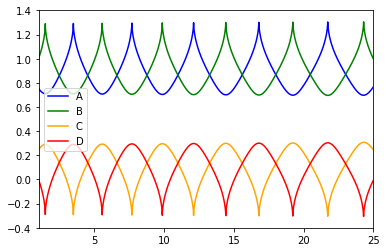

In [8]:
plt.xlim(1,25)
plt.ylim(-0.4,1.4)
plt.plot(a_x_posit,a_y_posit,label='A',c='blue')
plt.plot(b_x_posit,b_y_posit,label='B',c='green')
plt.plot(c_x_posit,c_y_posit,label='C', c='orange')
plt.plot(d_x_posit,d_y_posit,label='D',c='red')
plt.legend()
plt.show()

MY PLOTTED TRAJECTORIES AGREE VERY WELL WITH MY SCHEMATIC PREDICTIONS. We can see that the square configuration is formed over and over again (seeing that there are oscillations) when we look at the plot and draw imaginary lines from one vertice to another (like a rectangle). Also, when we look at the evolution of the vortices over time (changing i consecutively in the below code), it looks like what I predicted! You may need to change the i so that it is not 1, 2, 3, etc. but rather 100, 200, 300 or something like this so that the visualization moves quicker.

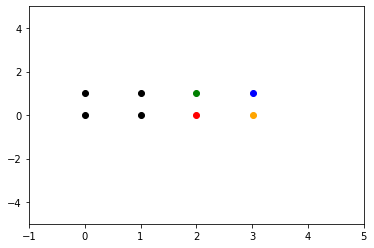

In [19]:
#plot of initial positions
ax0 = 0; bx0 = 1; cx0 = 0; dx0 = 1 #define initial x coordinates for the 4 vortices
ay0 = 1; by0 = 1; cy0 = 0; dy0 = 0 #define initial y coordinates for the 4 vortices
i = 700
plt.scatter(a_x_posit[i],a_y_posit[i],c='blue')
plt.scatter(b_x_posit[i],b_y_posit[i],c='green')
plt.scatter(c_x_posit[i],c_y_posit[i],c='orange')
plt.scatter(d_x_posit[i],d_y_posit[i],c='red')

plt.xlim(-1,5); plt.ylim(-5,5)
plt.scatter(ax0,ay0,c='k')
plt.scatter(bx0,by0,c='k')
plt.scatter(cx0,cy0,c='k')
plt.scatter(dx0,dy0,c='k')
plt.show()

### 2.5. 
Now play around with perturbing the location of one of the vortices. How sensitive are the vortex trajectories to perturbations from their initially ordered configuration?

In [20]:
# run a loop
circ_a = 1; circ_b = 1; circ_c = -1; circ_d = -1
delta_t = 0.01

ax0 = 0.01; bx0 = 1; cx0 = 0; dx0 = 1 #define initial x coordinates for the 4 vortices 
# Here, I changed the position of A from (0,1) to (0.01, 1), which is a very small perturbation (to me).
ay0 = 1; by0 = 1; cy0 = 0; dy0 = 0 #define initial y coordinates for the 4 vortices

a_x_posit = [0.01]; a_y_posit = [1]; b_x_posit = [1]; b_y_posit = [1] #starting the list
c_x_posit = [0]; c_y_posit = [0]; d_x_posit = [1]; d_y_posit = [0]

for i in range(1,50000):
    vel_ab = (velocity([ax0,ay0],[bx0,by0],circ_b))
    vel_ac = (velocity([ax0,ay0],[cx0,cy0],circ_c))
    vel_ad = (velocity([ax0,ay0],[dx0,dy0],circ_d))

    vel_ba = (velocity([bx0,by0],[ax0,ay0],circ_a))
    vel_bc = (velocity([bx0,by0],[cx0,cy0],circ_c))
    vel_bd = (velocity([bx0,by0],[dx0,dy0],circ_d))

    vel_ca = (velocity([cx0,cy0],[ax0,ay0],circ_a))
    vel_cb = (velocity([cx0,cy0],[bx0,by0],circ_b))
    vel_cd = (velocity([cx0,cy0],[dx0,dy0],circ_d))

    vel_da = (velocity([dx0,dy0],[ax0,ay0],circ_a))
    vel_db = (velocity([dx0,dy0],[bx0,by0],circ_b))
    vel_dc = (velocity([dx0,dy0],[cx0,cy0],circ_c))

    ax = ax0 + delta_t*(vel_ab[0] + vel_ac[0] + vel_ad[0])
    ay = ay0 + delta_t*(vel_ab[1] + vel_ac[1] + vel_ad[1])

    bx = bx0 + delta_t*(vel_ba[0] + vel_bc[0] + vel_bd[0])
    by = by0 + delta_t*(vel_ba[1] + vel_bc[1] + vel_bd[1])

    cx = cx0 + delta_t*(vel_ca[0] + vel_cb[0] + vel_cd[0])
    cy = cy0 + delta_t*(vel_ca[1] + vel_cb[1] + vel_cd[1])

    dx = dx0 + delta_t*(vel_da[0] + vel_db[0] + vel_dc[0])
    dy = dy0 + delta_t*(vel_da[1] + vel_db[1] + vel_dc[1])
    
    a_x_posit.append(ax); a_y_posit.append(ay)
    b_x_posit.append(bx); b_y_posit.append(by)
    c_x_posit.append(cx); c_y_posit.append(cy)
    d_x_posit.append(dx); d_y_posit.append(dy)
    
    ax0 = ax; bx0 = bx; cx0 = cx; dx0 = dx
    ay0 = ay; by0 = by; cy0 = cy; dy0 = dy

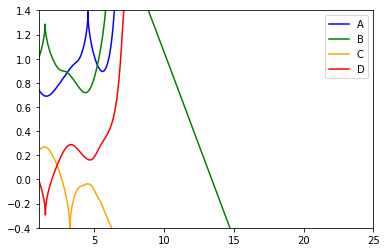

In [21]:
plt.xlim(1,25)
plt.ylim(-0.4,1.4)
plt.plot(a_x_posit,a_y_posit,label='A',c='blue')
plt.plot(b_x_posit,b_y_posit,label='B',c='green')
plt.plot(c_x_posit,c_y_posit,label='C', c='orange')
plt.plot(d_x_posit,d_y_posit,label='D',c='red')
plt.legend()
plt.show()

I changed my A point from (0, 1) to (0.01, 1) and the vortex trajectories are evidently VERY sensitive to perturbations from their initially ordered configuration. It looks very strange. I offer a more zoomed out view below and we can see that it is very sensitive. The trajectories run away.

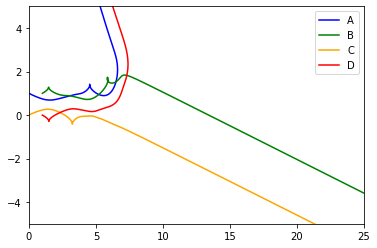

In [24]:
plt.xlim(0,25)
plt.ylim(-5,5)
plt.plot(a_x_posit,a_y_posit,label='A',c='blue')
plt.plot(b_x_posit,b_y_posit,label='B',c='green')
plt.plot(c_x_posit,c_y_posit,label='C', c='orange')
plt.plot(d_x_posit,d_y_posit,label='D',c='red')
plt.legend()
plt.show()